### Lecutre 12a

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
sibs = ['alice', 'bob', 'carol', 'daisy']
ages = [19, 7, 12, 3]
foods = ['sushi', 'tacos', 'kiwi', 'skittles']
animals = ['unicorn', 'panda', 'monkey', 'rhino']
sib_data = list(zip(ages, foods, animals))

Panda: data analysis  
economic analysis  
built on numpy

In [54]:
sib_data

[(19, 'sushi', 'unicorn'),
 (7, 'tacos', 'panda'),
 (12, 'kiwi', 'monkey'),
 (3, 'skittles', 'rhino')]

### Series  
A Series is like a dictionary but it is ordered. So you can call a value by a calling the index. Dictionary items can only be called using the key. 

In [56]:
pd.Series(ages) # series: kind of like array/dictionary

0    19
1     7
2    12
3     3
dtype: int64

In [57]:
sib_ages = pd.Series(ages, index=sibs) # index are like keys in dictionary
sib_ages

alice    19
bob       7
carol    12
daisy     3
dtype: int64

In [58]:
type(sib_ages)

pandas.core.series.Series

In [59]:
sib_ages.values #output an array

array([19,  7, 12,  3])

In [60]:
sib_ages.index

Index(['alice', 'bob', 'carol', 'daisy'], dtype='object')

In [61]:
type(sib_ages.index) #type = pandas index

pandas.core.indexes.base.Index

In [62]:
sib_ages[2]

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/1067640998.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sib_ages[2]


12

In [63]:
sib_ages['carol']

12

In [64]:
sib_ages[:2]

alice    19
bob       7
dtype: int64

In [65]:
sib_ages[['alice', 'carol']]

alice    19
carol    12
dtype: int64

In [66]:
'bob' in sib_ages

True

In [67]:
'edgar' in sib_ages

False

In [68]:
sib_ages > 10

alice     True
bob      False
carol     True
daisy    False
dtype: bool

In [69]:
sib_ages[sib_ages > 10]

alice    19
carol    12
dtype: int64

In [70]:
sib_ages[(sib_ages > 10) & (sib_ages < 18)]

carol    12
dtype: int64

In [71]:
sib_ages[sib_ages.between(12, 19)] # closed interval, includes endpts

alice    19
carol    12
dtype: int64

In [72]:
sib_ages[sib_ages.isin([3, 7])]

bob      7
daisy    3
dtype: int64

### DataFrames

In [74]:
sib_data

[(19, 'sushi', 'unicorn'),
 (7, 'tacos', 'panda'),
 (12, 'kiwi', 'monkey'),
 (3, 'skittles', 'rhino')]

In [75]:
pd.DataFrame(sib_data)

,0,1,2
0,19,sushi,unicorn
1,7,tacos,panda
2,12,kiwi,monkey
3,3,skittles,rhino


In [76]:
df_sib = pd.DataFrame(sib_data, index=sibs, columns=['age', 'food', 'animal'])
df_sib

,age,food,animal
alice,19,sushi,unicorn
bob,7,tacos,panda
carol,12,kiwi,monkey
daisy,3,skittles,rhino


In [77]:
len(df_sib)

4

In [78]:
type(df_sib)

pandas.core.frame.DataFrame

In [79]:
df_sib.shape

(4, 3)

In [80]:
df_sib.columns

Index(['age', 'food', 'animal'], dtype='object')

In [81]:
df_sib.index

Index(['alice', 'bob', 'carol', 'daisy'], dtype='object')

In [82]:
df_sib.values

array([[19, 'sushi', 'unicorn'],
       [7, 'tacos', 'panda'],
       [12, 'kiwi', 'monkey'],
       [3, 'skittles', 'rhino']], dtype=object)

### Accessing Rows

In [84]:
df_sib.loc['carol']

age           12
food        kiwi
animal    monkey
Name: carol, dtype: object

In [85]:
df_sib.loc['alice': 'carol']

,age,food,animal
alice,19,sushi,unicorn
bob,7,tacos,panda
carol,12,kiwi,monkey


In [86]:
df_sib.iloc[:3]

,age,food,animal
alice,19,sushi,unicorn
bob,7,tacos,panda
carol,12,kiwi,monkey


### Accessing Columns

In [88]:
df_sib['food'] # brackets and quotes required when creating a new column

alice       sushi
bob         tacos
carol        kiwi
daisy    skittles
Name: food, dtype: object

In [89]:
df_sib.food # shortcut, doesn't work if col name have spaces
            # begin with numbers
            # if math python function/keyword

alice       sushi
bob         tacos
carol        kiwi
daisy    skittles
Name: food, dtype: object

In [90]:
df_sib[['food', 'age']]

,food,age
alice,sushi,19
bob,tacos,7
carol,kiwi,12
daisy,skittles,3


In [91]:
df_sib.iloc[:, [1, 0]]

,food,age
alice,sushi,19
bob,tacos,7
carol,kiwi,12
daisy,skittles,3


In [92]:
df_sib

,age,food,animal
alice,19,sushi,unicorn
bob,7,tacos,panda
carol,12,kiwi,monkey
daisy,3,skittles,rhino


### Adding a Column

In [94]:
df_sib['is_child'] = df_sib.age < 18 # must use bracket notation

In [95]:
df_sib

,age,food,animal,is_child
alice,19,sushi,unicorn,False
bob,7,tacos,panda,True
carol,12,kiwi,monkey,True
daisy,3,skittles,rhino,True


### Sorting a DataFrame column

In [97]:
df_sib.sort_values(by='age')

,age,food,animal,is_child
daisy,3,skittles,rhino,True
bob,7,tacos,panda,True
carol,12,kiwi,monkey,True
alice,19,sushi,unicorn,False


In [98]:
df_sib.sort_values(by='age', ascending=False) # makes a copy

,age,food,animal,is_child
alice,19,sushi,unicorn,False
carol,12,kiwi,monkey,True
bob,7,tacos,panda,True
daisy,3,skittles,rhino,True


In [99]:
df_sib.sort_values(by='age', ascending=False, inplace=True) # modify df_sib

In [100]:
df_sib

,age,food,animal,is_child
alice,19,sushi,unicorn,False
carol,12,kiwi,monkey,True
bob,7,tacos,panda,True
daisy,3,skittles,rhino,True


### IMDB Reading

In [102]:
dfmovie = pd.read_csv('imdb-movie.csv', index_col='Title')
dfmovie

,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
...,...,...,...,...,...,...,...,...,...,...
This Beautiful Fantastic,"Comedy,Drama,Fantasy",A young woman who dreams of being a children's...,Simon Aboud,"Jessica Brown Findlay, Andrew Scott, Jeremy Ir...",2016,100,6.9,688,NaN,51.0
Triangle,"Fantasy,Mystery,Thriller",The story revolves around the passengers of a ...,Christopher Smith,"Melissa George, Joshua McIvor, Jack Taylor,Mic...",2009,99,6.9,72533,NaN,66.0
True Crimes,"Crime,Drama,Thriller",A murder investigation of a slain business man...,Alexandros Avranas,"Jim Carrey, Charlotte Gainsbourg, Marton Csoka...",2016,92,7.3,198,NaN,43.0


In [103]:
dfmovie.tail(2)

,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,
Twin Peaks: The Missing Pieces,"Drama,Horror,Mystery",Twin Peaks before Twin Peaks (1990) and at the...,David Lynch,"Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...",2014,91,8.1,1973,NaN,NaN
Winter's Bone,Drama,An unflinching Ozark Mountain girl hacks throu...,Debra Granik,"Jennifer Lawrence, John Hawkes, Garret Dillahu...",2010,100,7.2,116435,NaN,NaN


In [104]:
dfmovie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Star Wars: Episode VII - The Force Awakens to Winter's Bone
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               500 non-null    object 
 1   Description         500 non-null    object 
 2   Director            500 non-null    object 
 3   Actors              500 non-null    object 
 4   Year                500 non-null    int64  
 5   Runtime (Minutes)   500 non-null    int64  
 6   Rating              500 non-null    float64
 7   Votes               500 non-null    int64  
 8   Revenue (Millions)  465 non-null    float64
 9   Metascore           467 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 43.0+ KB


In [105]:
dfmovie.describe() #for numerical data

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,500.000000,500.000000,500.000000,5.000000e+02,465.000000,467.000000
mean,2012.166000,119.494000,7.461000,2.486979e+05,99.529118,69.051392
std,3.319712,19.779596,0.444042,2.246276e+05,121.446885,13.389571
min,2006.000000,66.000000,6.800000,6.100000e+01,0.010000,23.000000
25%,2009.000000,105.000000,7.100000,8.955050e+04,14.670000,60.000000
50%,2013.000000,117.000000,7.400000,1.998365e+05,54.120000,70.000000
75%,2015.000000,130.250000,7.800000,3.465072e+05,141.320000,79.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [106]:
dfmovie.loc['Avatar']

Genre                                          Action,Adventure,Fantasy
Description           A paraplegic marine dispatched to the moon Pan...
Director                                                  James Cameron
Actors                Sam Worthington, Zoe Saldana, Sigourney Weaver...
Year                                                               2009
Runtime (Minutes)                                                   162
Rating                                                              7.8
Votes                                                            935408
Revenue (Millions)                                               760.51
Metascore                                                          83.0
Name: Avatar, dtype: object

In [107]:
dfmovie.Year.describe()

count     500.000000
mean     2012.166000
std         3.319712
min      2006.000000
25%      2009.000000
50%      2013.000000
75%      2015.000000
max      2016.000000
Name: Year, dtype: float64

In [108]:
dfmovie.Year = dfmovie.Year.astype('category')

In [109]:
dfmovie.Year.describe()

count      500
unique      11
top       2016
freq       114
Name: Year, dtype: int64

In [110]:
dfmovie.Rating.max()

9.0

In [111]:
dfmovie.Rating.min()

6.8

In [112]:
dfmovie.Rating.nlargest(10)

Title
The Dark Knight          9.0
Inception                8.8
Dangal                   8.8
Interstellar             8.6
The Intouchables         8.6
Kimi no na wa            8.6
The Dark Knight Rises    8.5
The Departed             8.5
The Prestige             8.5
Whiplash                 8.5
Name: Rating, dtype: float64

In [113]:
dfmovie.Rating.mean()

7.461

In [170]:
dfmovie.columns

Index(['Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [174]:
dfmovie.rename(columns={'Runtime (Minutes)': 'Runtime_min', 
                        'Revenue (Millions)': 'Revenue_mil'}, 
                inplace=True)

In [179]:
dfmovie.Year.dtype

CategoricalDtype(categories=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
                  2016],
, ordered=False, categories_dtype=int64)

In [181]:
dfmovie.Year.unique()

[2015, 2009, 2012, 2008, 2016, ..., 2006, 2010, 2011, 2014, 2007]
Length: 11
Categories (11, int64): [2006, 2007, 2008, 2009, ..., 2013, 2014, 2015, 2016]

In [185]:
dfmovie.Year.unique().tolist() # change column to a list instead of default series

[2015, 2009, 2012, 2008, 2016, 2013, 2006, 2010, 2011, 2014, 2007]

### Column Operations

In [264]:
ratings = dfmovie.Rating
ratings

Title
Star Wars: Episode VII - The Force Awakens    8.1
Avatar                                        7.8
Jurassic World                                7.0
The Avengers                                  8.1
The Dark Knight                               9.0
                                             ... 
This Beautiful Fantastic                      6.9
Triangle                                      6.9
True Crimes                                   7.3
Twin Peaks: The Missing Pieces                8.1
Winter's Bone                                 7.2
Name: Rating, Length: 500, dtype: float64

In [198]:
ratings.describe()

count    500.000000
mean       7.461000
std        0.444042
min        6.800000
25%        7.100000
50%        7.400000
75%        7.800000
max        9.000000
Name: Rating, dtype: float64

In [200]:
ratings.mean()

7.461

In [206]:
ratings.median()

7.4

In [208]:
ratings.sum()

3730.5

In [212]:
ratings.max()

9.0

In [220]:
ratings.nlargest(3)

Title
The Dark Knight    9.0
Inception          8.8
Dangal             8.8
Name: Rating, dtype: float64

In [224]:
ratings.nlargest(3).index

Index(['The Dark Knight', 'Inception', 'Dangal'], dtype='object', name='Title')

Extract the movies with ratings between 8.5 and 9 inclusive

In [253]:
ratings[(ratings <= 9) & (ratings >= 8.5)]

Title
The Dark Knight          9.0
The Dark Knight Rises    8.5
Inception                8.8
Interstellar             8.6
The Departed             8.5
The Prestige             8.5
The Intouchables         8.6
Whiplash                 8.5
The Lives of Others      8.5
Dangal                   8.8
Kimi no na wa            8.6
Taare Zameen Par         8.5
Name: Rating, dtype: float64

In [251]:
ratings[ratings.between(8.5, 9)].index

Index(['The Dark Knight', 'The Dark Knight Rises', 'Inception', 'Interstellar',
       'The Departed', 'The Prestige', 'The Intouchables', 'Whiplash',
       'The Lives of Others', 'Dangal', 'Kimi no na wa', 'Taare Zameen Par'],
      dtype='object', name='Title')

### Identifying rows with max/min values

In [256]:
ratings.max()

9.0

In [274]:
ratings.idxmax() #shortcut

'The Dark Knight'

In [276]:
dfmovie.Revenue_mil.idxmin()

'Love, Rosie'

### Plotting A Column with DataFrame

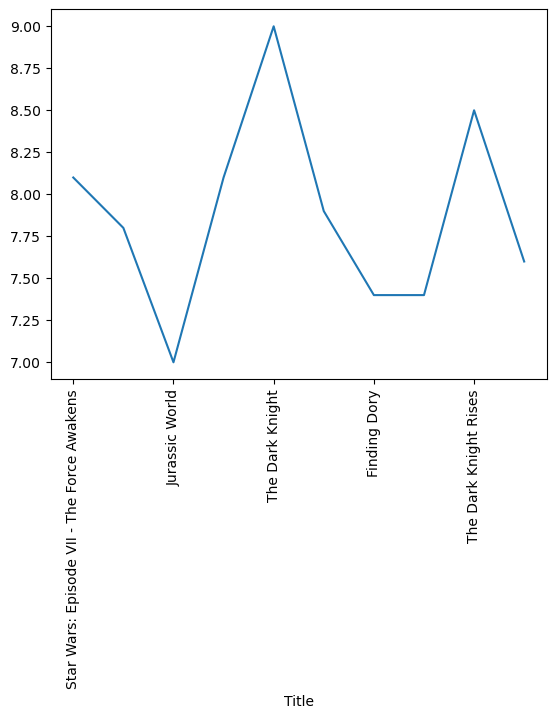

In [292]:
ratings[:10].plot()
plt.xticks(rotation=90);

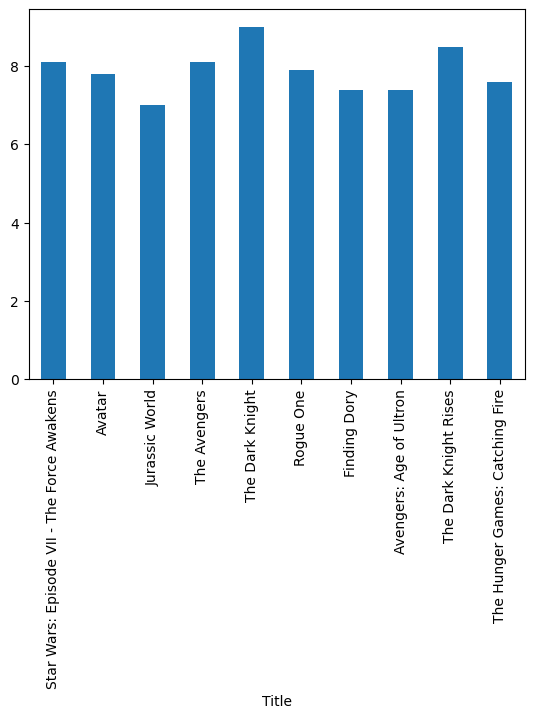

In [294]:
ratings[:10].plot(kind='bar')
plt.xticks(rotation=90);

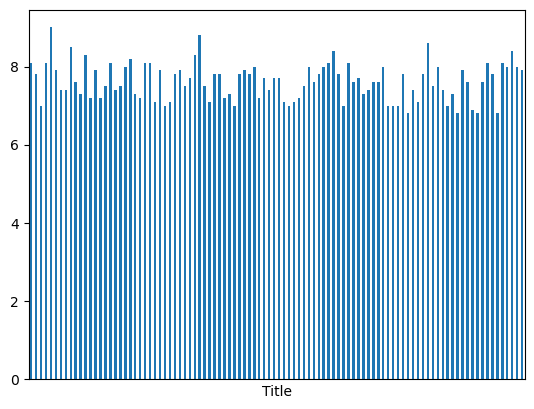

In [298]:
ratings[:100].plot(kind='bar')
plt.xticks([]);

<Axes: >

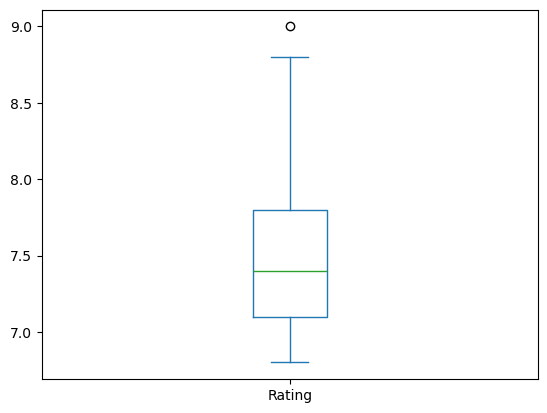

In [302]:
ratings.plot(kind='box')

<Axes: ylabel='Frequency'>

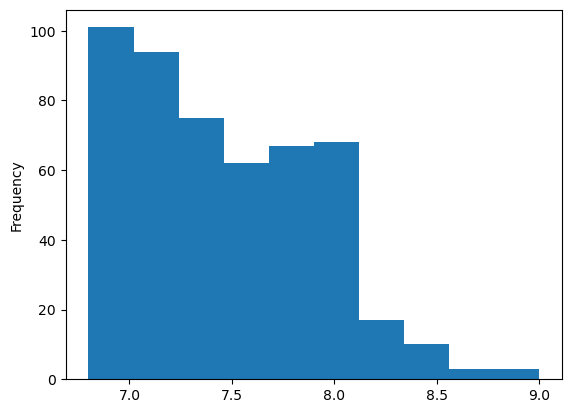

In [304]:
ratings.plot(kind='hist')

In [306]:
ratings.nlargest()

Title
The Dark Knight     9.0
Inception           8.8
Dangal              8.8
Interstellar        8.6
The Intouchables    8.6
Name: Rating, dtype: float64

### Frequencies

In [317]:
ratings.value_counts() # decreasing order of frequency

Rating
7.1    52
7.0    46
7.2    42
7.3    42
7.8    40
7.5    35
7.4    33
6.9    31
7.6    27
7.7    27
8.1    26
6.8    24
7.9    23
8.0    19
8.2    10
8.3     7
8.5     6
8.4     4
8.6     3
8.8     2
9.0     1
Name: count, dtype: int64

In [323]:
ratings.value_counts().sort_index() # index order

Rating
6.8    24
6.9    31
7.0    46
7.1    52
7.2    42
7.3    42
7.4    33
7.5    35
7.6    27
7.7    27
7.8    40
7.9    23
8.0    19
8.1    26
8.2    10
8.3     7
8.4     4
8.5     6
8.6     3
8.8     2
9.0     1
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='Revenue_mil'>

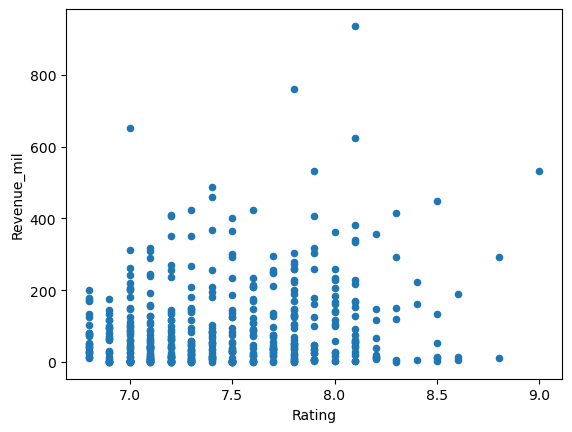

In [325]:
dfmovie.plot(x='Rating', y='Revenue_mil', kind='scatter')

### Groupby

In [328]:
dfmovie.groupby('Year')

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/2116512547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmovie.groupby('Year')


In [332]:
dfmovie.groupby('Year').describe()

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/3538706134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmovie.groupby('Year').describe()


Runtime_min                                                             \
           count        mean        std   min     25%    50%     75%    max   
Year                                                                          
2006        28.0  125.928571  18.812779  96.0  115.25  120.0  140.00  180.0   
2007        42.0  125.095238  22.123610  96.0  111.50  121.5  132.00  191.0   
2008        29.0  112.482759  19.217962  85.0   96.00  111.0  123.00  166.0   
2009        29.0  119.517241  25.251055  87.0   97.00  111.0  140.00  170.0   
2010        32.0  113.656250  14.546055  92.0  102.25  112.5  121.00  148.0   
2011        38.0  118.052632  15.530175  93.0  105.25  116.5  129.75  158.0   
2012        37.0  125.567568  23.463376  93.0  109.00  120.0  143.00  172.0   
2013        48.0  120.416667  21.681283  85.0  103.50  119.0  131.25  180.0   
2014        47.0  118.489362  19.396181  86.0  102.00  114.0  132.00  169.0   
2015        56.0  122.303571  17.038907  92.0  111.75  121.0  130.25  187.0   
2016       114.0  116.421053  18.504673  66.0  104.00  116.0  128.00  163.0   

     Rating            ... Revenue_mil         Metascore             \
      count      mean  ...         75%     max     count       mean   
Year                   ...                                            
2006   28.0  7.592857  ...    130.4600  423.03      26.0  68.961538   
2007   42.0  7.447619  ...    128.9200  318.76      36.0  69.361111   
2008   29.0  7.479310  ...    136.2200  533.32      26.0  66.346154   
2009   29.0  7.672414  ...    186.8950  760.51      27.0  69.740741   
2010   32.0  7.500000  ...    171.5400  414.98      31.0  69.741935   
2011   38.0  7.381579  ...    145.7125  380.96      37.0  69.243243   
2012   37.0  7.464865  ...    182.2000  623.28      36.0  69.888889   
2013   48.0  7.391667  ...    163.3650  424.65      46.0  68.326087   
2014   47.0  7.593617  ...    179.7475  350.12      44.0  69.204545   
2015   56.0  7.346429  ...    110.2650  936.63      52.0  67.884615   
2016  114.0  7.420175  ...     76.2000  532.17     106.0  69.726415   

                                                  
            std   min    25%   50%    75%    max  
Year                                              
2006  13.125489  47.0  62.25  67.0  79.25   98.0  
2007  13.975801  38.0  61.75  70.0  78.75   96.0  
2008  14.380382  36.0  55.50  67.0  76.75   94.0  
2009  12.826033  34.0  64.50  73.0  79.50   88.0  
2010  13.213548  40.0  61.50  72.0  79.00   95.0  
2011  10.698924  48.0  62.00  70.0  76.00   87.0  
2012  10.727209  50.0  62.75  68.5  78.25   95.0  
2013  12.915201  44.0  61.00  64.5  77.50   96.0  
2014  13.191928  31.0  59.00  71.5  76.00  100.0  
2015  15.720168  33.0  56.75  69.0  81.00   95.0  
2016  14.337120  23.0  60.25  72.0  79.00   99.0  

[11 rows x 40 columns]

In [443]:
dfmovie.groupby('Year').Rating.mean()

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/1485496225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmovie.groupby('Year').Rating.mean()


Year
2006    7.592857
2007    7.447619
2008    7.479310
2009    7.672414
2010    7.500000
2011    7.381579
2012    7.464865
2013    7.391667
2014    7.593617
2015    7.346429
2016    7.420175
Name: Rating, dtype: float64

In [336]:
dfmovie.groupby('Year').Rating.max()

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/740598057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmovie.groupby('Year').Rating.max()


Year
2006    8.5
2007    8.5
2008    9.0
2009    8.4
2010    8.8
2011    8.6
2012    8.5
2013    8.2
2014    8.6
2015    8.3
2016    8.8
Name: Rating, dtype: float64

In [339]:
dfmovie.groupby('Year').Rating.idxmax()

/var/folders/2m/ffpxvj6x6y9_869rd2330sl00000gn/T/ipykernel_26815/2303703881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmovie.groupby('Year').Rating.idxmax()


Year
2006               The Departed
2007           Taare Zameen Par
2008            The Dark Knight
2009                   3 Idiots
2010                  Inception
2011           The Intouchables
2012      The Dark Knight Rises
2013    The Wolf of Wall Street
2014               Interstellar
2015    Bahubali: The Beginning
2016                     Dangal
Name: Rating, dtype: object

### Missing values

In [342]:
dfmovie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Star Wars: Episode VII - The Force Awakens to Winter's Bone
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Genre        500 non-null    object  
 1   Description  500 non-null    object  
 2   Director     500 non-null    object  
 3   Actors       500 non-null    object  
 4   Year         500 non-null    category
 5   Runtime_min  500 non-null    int64   
 6   Rating       500 non-null    float64 
 7   Votes        500 non-null    int64   
 8   Revenue_mil  465 non-null    float64 
 9   Metascore    467 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 56.1+ KB


In [344]:
revenue = dfmovie.Revenue_mil
revenue

Title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
The Avengers                                  623.28
The Dark Knight                               533.32
                                               ...  
This Beautiful Fantastic                         NaN
Triangle                                         NaN
True Crimes                                      NaN
Twin Peaks: The Missing Pieces                   NaN
Winter's Bone                                    NaN
Name: Revenue_mil, Length: 500, dtype: float64

In [348]:
revenue.isna() # or is.null(). delete the ones without a value

Title
Star Wars: Episode VII - The Force Awakens    False
Avatar                                        False
Jurassic World                                False
The Avengers                                  False
The Dark Knight                               False
                                              ...  
This Beautiful Fantastic                       True
Triangle                                       True
True Crimes                                    True
Twin Peaks: The Missing Pieces                 True
Winter's Bone                                  True
Name: Revenue_mil, Length: 500, dtype: bool

Extract the rows with missing Revenue_mil

In [353]:
null_rows = dfmovie[dfmovie.Revenue_mil.isna()]

In [357]:
len(null_rows)

35

In [359]:
dfmovie.dropna() # omits all rows with at least one NaN value, and makes a copy

,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
Title,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
...,...,...,...,...,...,...,...,...,...,...
A Street Cat Named Bob,"Biography,Comedy,Drama",Based on the international best selling book. ...,Roger Spottiswoode,"Luke Treadaway, Bob the Cat, Ruta Gedmintas, J...",2016,103,7.4,12643,0.04,54.0
Before We Go,"Comedy,Drama,Romance",Two strangers stuck in Manhattan for the night...,Chris Evans,"Chris Evans, Alice Eve, Emma Fitzpatrick, John...",2014,95,6.9,31370,0.04,31.0
The First Time,"Comedy,Drama,Romance",A shy senior and a down-to-earth junior fall i...,Jon Kasdan,"Dylan O'Brien, Britt Robertson, Victoria Justi...",2012,95,6.9,54027,0.02,55.0


In [363]:
dfmovie.Actors

Title
Star Wars: Episode VII - The Force Awakens    Daisy Ridley, John Boyega, Oscar Isaac, Domhna...
Avatar                                        Sam Worthington, Zoe Saldana, Sigourney Weaver...
Jurassic World                                Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...
The Avengers                                  Robert Downey Jr., Chris Evans, Scarlett Johan...
The Dark Knight                               Christian Bale, Heath Ledger, Aaron Eckhart,Mi...
                                                                    ...                        
This Beautiful Fantastic                      Jessica Brown Findlay, Andrew Scott, Jeremy Ir...
Triangle                                      Melissa George, Joshua McIvor, Jack Taylor,Mic...
True Crimes                                   Jim Carrey, Charlotte Gainsbourg, Marton Csoka...
Twin Peaks: The Missing Pieces                Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...
Winter's Bone                     

In [367]:
dfmovie.Actors[dfmovie.Actors.str.contains('Jennifer')]

Title
The Hunger Games: Catching Fire    Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...
The Hunger Games                   Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...
X-Men: Apocalypse                  James McAvoy, Michael Fassbender, Jennifer Law...
We're the Millers                  Jason Sudeikis, Jennifer Aniston, Emma Roberts...
American Hustle                    Christian Bale, Amy Adams, Bradley Cooper,Jenn...
X: First Class                     James McAvoy, Michael Fassbender, Jennifer Law...
Juno                               Ellen Page, Michael Cera, Jennifer Garner, Jas...
Silver Linings Playbook            Bradley Cooper, Jennifer Lawrence, Robert De N...
Passengers                         Jennifer Lawrence, Chris Pratt, Michael Sheen,...
Coraline                           Dakota Fanning, Teri Hatcher, John Hodgman, Je...
Storks                             Andy Samberg, Katie Crown,Kelsey Grammer, Jenn...
Miracles from Heaven               Jennifer Garner, Kylie R

For the movie Juno, take the Actors and convert into a list of names. 

In [430]:
dfmovie.Actors['Juno'].split(', ')

['Ellen Page', 'Michael Cera', 'Jennifer Garner', 'Jason Bateman']

In [434]:
dfmovie.loc['Juno'].Actors.split(', ')

['Ellen Page', 'Michael Cera', 'Jennifer Garner', 'Jason Bateman']

Looking for a word in description

In [439]:
dfmovie[dfmovie.Description.str.contains('space')]

,Genre,Description,Director,Actors,Year,Runtime_min,Rating,Votes,Revenue_mil,Metascore
Title,,,,,,,,,,
Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0
WALL·E,"Animation,Adventure,Family","In the distant future, a small waste-collectin...",Andrew Stanton,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",2008,98,8.4,776897,223.81,NaN
Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0
Star Trek Beyond,"Action,Adventure,Sci-Fi",The USS Enterprise crew explores the furthest ...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...",2016,122,7.1,164567,158.80,68.0
Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
